In [41]:
import pandas as pd
from datetime import datetime
df=pd.read_csv("./data/rapporti_ISS - Aifa.csv")
df["data"] = pd.to_datetime(df["data"])
df["data_str"] = df["data"].apply(lambda x: x.strftime("%Y-%m-%d"))
import sys
sys.path.append("../")
from utils import createXYPlot

import matplotlib.pyplot as plt

In [42]:
df["variazione dosi"] = df["dosi somministrate"] - df["dosi somministrate"].shift(-1)
df["variazione dosi"] = df["variazione dosi"].combine_first(df["dosi somministrate"])

In [44]:
df["incidenza segnalazioni gravi"] = df["variazione segnalazioni gravi"]/df["variazione dosi"]

In [45]:
df

,data,dosi somministrate,totale segnalazioni,variazione segnalazioni,pct segnalazioni gravi,segnalazioni gravi,variazione segnalazioni gravi,pct variazione segnalazioni gravi,data_str,variazione dosi,incidenza segnalazioni gravi
0,2021-12-26,108530987,117920,16810,16.2,19103,4543,27.03,2021-12-26,24520382.0,0.000185
1,2021-09-26,84010605,101110,9750,14.4,14560,1952,20.02,2021-09-26,7500759.0,0.000260
2,2021-08-26,76509846,91360,7038,13.8,12608,1814,25.78,2021-08-26,10583255.0,0.000171
3,2021-07-26,65926591,84322,8116,12.8,10793,1725,21.25,2021-07-26,16413792.0,0.000105
4,2021-06-26,49512799,76206,9948,11.9,9069,2178,21.89,2021-06-26,17083188.0,0.000127
5,2021-05-26,32429611,66258,10148,10.4,6891,2065,20.35,2021-05-26,14281217.0,0.000145
6,2021-04-26,18148394,56110,9873,8.6,4825,1543,15.62,2021-04-26,9080045.0,0.000170
7,2021-03-26,9068349,46237,16222,7.1,3283,1452,8.95,2021-03-26,4950072.0,0.000293
8,2021-02-26,4118277,30015,22678,6.1,1831,1295,5.71,2021-02-26,2554187.0,0.000507
9,2021-01-26,1564090,7337,7337,7.3,536,536,7.30,2021-01-26,1564090.0,0.000343


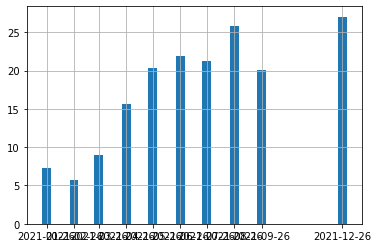

In [55]:
plt.bar(df["data"], df["pct variazione segnalazioni gravi"], width=10)
plt.xticks(df["data"],df["data_str"])
plt.grid()